In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(-6.0, 10.0)

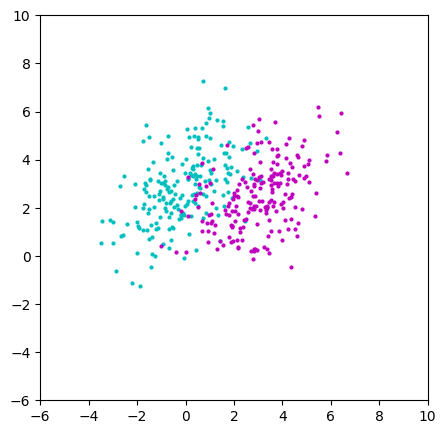

In [ ]:
NumDataPerClass = 200

m1 = [[0 , 3]]
m2 = [[3 , 2.5]]
c = [[2,1], [1,2]]

#Set up the data by generating isotropic Gaussians and rotating them accordingly

A = np.linalg.cholesky(c)

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4) #creates a scatter plot of the data points in X.
ax.scatter(X2[:,0], X2[:,1], c="m", s=4) #creates a scatter plot of the data points in Y.
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

In [ ]:
def gauss2D(x, m, C):
  Ci = np.linalg.inv(C)
  dC = np.linalg.det(C1)
  num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
  den = 2 * np.pi * dC
  return num/den

In [ ]:
def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
  x = np.linspace(-6, 10, nx)
  y = np.linspace(-6, 10, ny)
  X, Y = np.meshgrid(x, y, indexing='ij')

  Z = np.zeros([nx, ny])
  for i in range(nx):
      for j in range(ny):
        xvec = np.array([X[i,j], Y[i,j]])
        num = P1*gauss2D(xvec, m1, C1)
        den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
        Z[i,j] = num / den
  return X, Y, Z


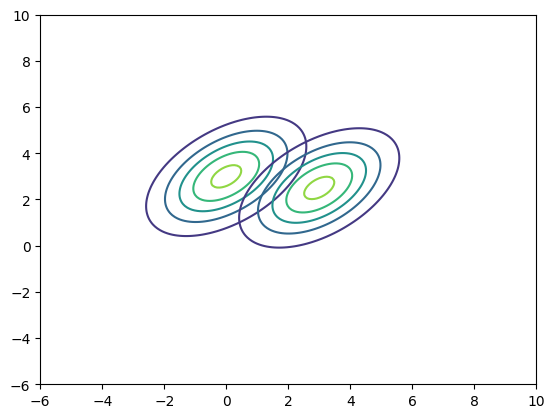

In [ ]:
def twoDGaussianPlot (nx, ny, m, C):
  x = np.linspace(-6, 10, nx)
  y = np.linspace(-6, 10, ny)
  X, Y = np.meshgrid(x, y, indexing='ij')
  Z = np.zeros([nx, ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      Z[i,j] = gauss2D(xvec, m, C)
  return X, Y, Z

# Plot contours
#
nx, ny = 200, 200
m1 = np.array([0,3])
C1 = np.array([[2,1], [1,2]], np.float32)
X1, Y1, Z1 = twoDGaussianPlot (nx, ny, m1, C1)

m2 = np.array([3, 2.5])
C2 = np.array([[2,1], [1,2]], np.float32)
X2, Y2, Z2 = twoDGaussianPlot (nx, ny, m2, C2)


plt.contour(X1, Y1, Z1, 5)
plt.contour(X2, Y2, Z2, 5)


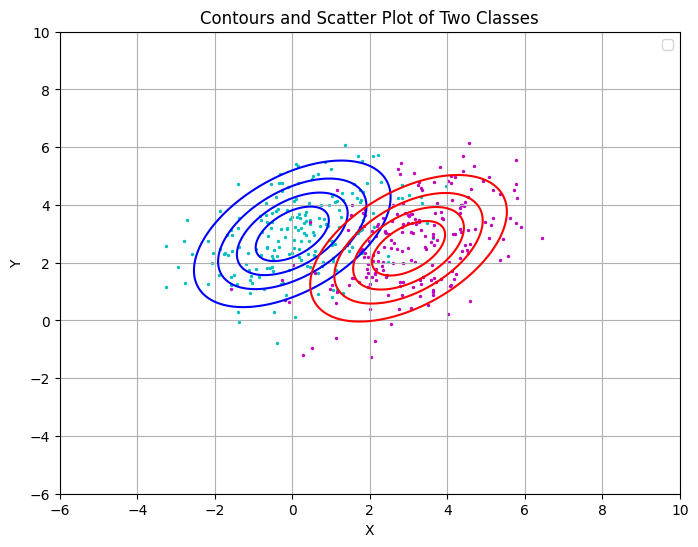

In [ ]:
def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-6, 10, nx)
    y = np.linspace(-6, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            Z[i, j] = gauss2D(xvec, m, C)
    return X, Y, Z

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    d = x - m
    return np.exp(-0.5 * np.dot(d.T, np.dot(Ci, d)))

# Define parameters for contour plots
nx, ny = 200, 200  # Increased number of points for better resolution
m1 = np.array([0, 3])
C1 = np.array([[2, 1], [1, 2]], np.float32)
X1, Y1, Z1 = twoDGaussianPlot(nx, ny, m1, C1)

m2 = np.array([3, 2.5])
C2 = np.array([[2, 1], [1, 2]], np.float32)
X2, Y2, Z2 = twoDGaussianPlot(nx, ny, m2, C2)

# Define parameters for scatter plot
NumDataPerClass = 200
m1_scatter = np.array([0, 3])
m2_scatter = np.array([3, 2.5])
c_scatter = np.array([[2, 1], [1, 2]])

# Set up the data by generating isotropic Gaussians and rotating them accordingly
A_scatter = np.linalg.cholesky(c_scatter)

U1_scatter = np.random.randn(NumDataPerClass, 2)
X1_scatter = U1_scatter @ A_scatter.T + m1_scatter

U2_scatter = np.random.randn(NumDataPerClass, 2)
X2_scatter = U2_scatter @ A_scatter.T + m2_scatter

plt.figure(figsize=(8, 6))
plt.contour(X1, Y1, Z1, 5, colors='b')  # Contour for class 1
plt.contour(X2, Y2, Z2, 5, colors='r')  # Contour for class 2

# Scatter plot on top of contours
plt.scatter(X1_scatter[:, 0], X1_scatter[:, 1], c="c", s=2)
plt.scatter(X2_scatter[:, 0], X2_scatter[:, 1], c="m", s=2)

# # Scatter plot means
# plt.scatter(m1_scatter[0], m1_scatter[1], color='c', marker='x', label='Class 1 Mean', zorder=5)
# plt.scatter(m2_scatter[0], m2_scatter[1], color='m', marker='x', label='Class 2 Mean', zorder=5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contours and Scatter Plot of Two Classes')
plt.xlim(-6, 10)
plt.ylim(-6, 10)
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Contours on the posterior probability')

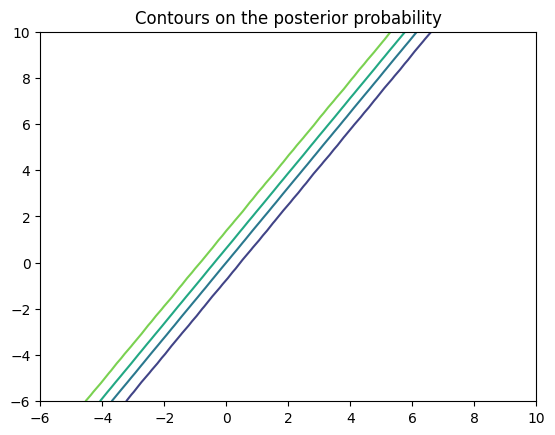

In [ ]:
# Plot contours
#
nx, ny = 50, 40
m1 = np.array([0,3])
m2 = np.array([3,2.5])

C1 = np.array([[2,1], [1,2]], np.float32)
C2 = np.array([[2,1], [1,2]], np.float32)

P1 = 0.5
P2 = 0.5

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 5)
plt.title('Contours on the posterior probability')

Case 2


(-6.0, 15.0)

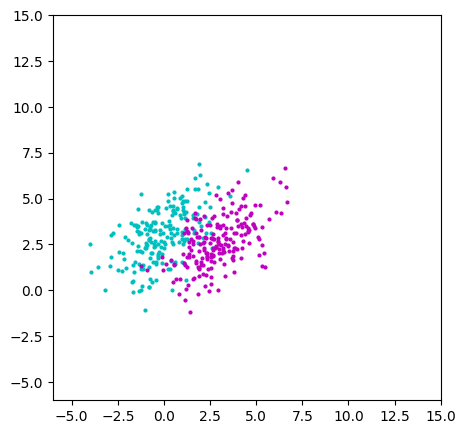

In [ ]:
NumDataPerClass = 200

m1 = [[0 , 3]]
m2 = [[3 , 2.5]]
c = [[2,1], [1,2]]

#Set up the data by generating isotropic Gaussians and rotating them accordingly

A = np.linalg.cholesky(c)

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4) #creates a scatter plot of the data points in X.
ax.scatter(X2[:,0], X2[:,1], c="m", s=4) #creates a scatter plot of the data points in Y.
ax.set_xlim(-6, 15)
ax.set_ylim(-6, 15)

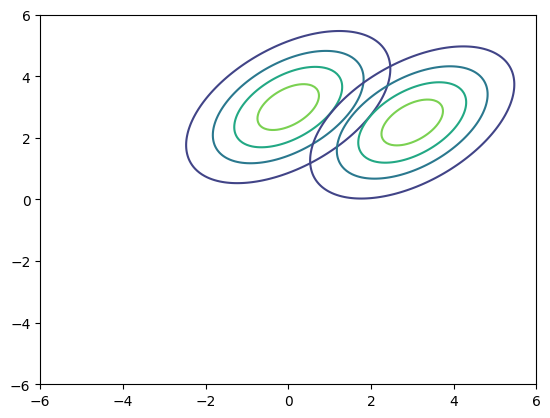

In [ ]:
nx, ny = 200, 200
m1 = np.array([0,3])
C1 = np.array([[2,1], [1,2]], np.float32)
X1, Y1, Z1 = twoDGaussianPlot (nx, ny, m1, C1)

m2 = np.array([3, 2.5])
C2 = np.array([[2,1], [1,2]], np.float32)
X2, Y2, Z2 = twoDGaussianPlot (nx, ny, m2, C2)


plt.contour(X1, Y1, Z1, 5)
plt.contour(X2, Y2, Z2, 5)

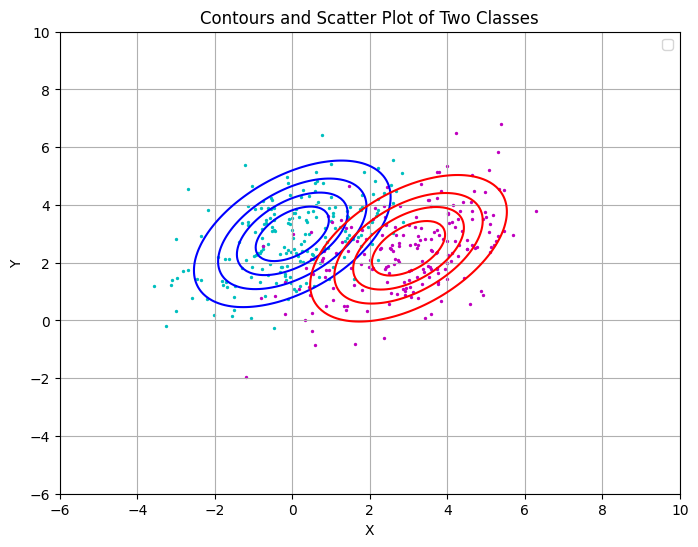

In [ ]:
def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-6, 10, nx)
    y = np.linspace(-6, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            Z[i, j] = gauss2D(xvec, m, C)
    return X, Y, Z

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    d = x - m
    return np.exp(-0.5 * np.dot(d.T, np.dot(Ci, d)))

# Define parameters for contour plots
nx, ny = 200, 200  # Increased number of points for better resolution
m1 = np.array([0, 3])
C1 = np.array([[2, 1], [1, 2]], np.float32)
X1, Y1, Z1 = twoDGaussianPlot(nx, ny, m1, C1)

m2 = np.array([3, 2.5])
C2 = np.array([[2, 1], [1, 2]], np.float32)
X2, Y2, Z2 = twoDGaussianPlot(nx, ny, m2, C2)

# Define parameters for scatter plot
NumDataPerClass = 200
m1_scatter = np.array([0, 3])
m2_scatter = np.array([3, 2.5])
c_scatter = np.array([[2, 1], [1, 2]])

# Set up the data by generating isotropic Gaussians and rotating them accordingly
A_scatter = np.linalg.cholesky(c_scatter)

U1_scatter = np.random.randn(NumDataPerClass, 2)
X1_scatter = U1_scatter @ A_scatter.T + m1_scatter

U2_scatter = np.random.randn(NumDataPerClass, 2)
X2_scatter = U2_scatter @ A_scatter.T + m2_scatter

plt.figure(figsize=(8, 6))
plt.contour(X1, Y1, Z1, 5, colors='b')  # Contour for class 1
plt.contour(X2, Y2, Z2, 5, colors='r')  # Contour for class 2

# Scatter plot on top of contours
plt.scatter(X1_scatter[:, 0], X1_scatter[:, 1], c="c", s=2)
plt.scatter(X2_scatter[:, 0], X2_scatter[:, 1], c="m", s=2)

# # Scatter plot means
# plt.scatter(m1_scatter[0], m1_scatter[1], color='c', marker='x', label='Class 1 Mean', zorder=5)
# plt.scatter(m2_scatter[0], m2_scatter[1], color='m', marker='x', label='Class 2 Mean', zorder=5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contours and Scatter Plot of Two Classes')
plt.xlim(-6, 10)
plt.ylim(-6, 10)
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Contours on the posterior probability')

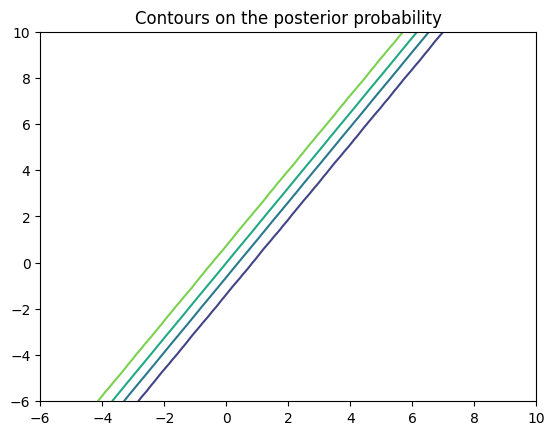

In [ ]:
# Plot contours
#
nx, ny = 50, 40
m1 = np.array([0,3])
m2 = np.array([3,2.5])

C1 = np.array([[2,1], [1,2]], np.float32)
C2 = np.array([[2,1], [1,2]], np.float32)

P1 = 0.7
P2 = 0.3

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 5)
plt.title('Contours on the posterior probability')

(-6.0, 15.0)

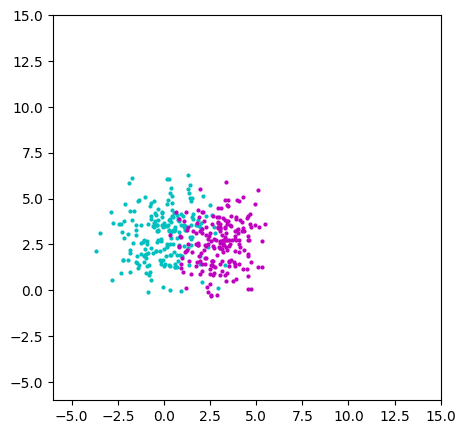

In [ ]:
NumDataPerClass = 200

m1 = [[0 , 3]]
m2 = [[3 , 2.5]]
c1 = [[2,0], [0,2]]
c2 = [[1.5 , 0], [0, 1.5]]


#Set up the data by generating isotropic Gaussians and rotating them accordingly

A1 = np.linalg.cholesky(c1)
A2 = np.linalg.cholesky(c2)

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A1.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A2.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4) #creates a scatter plot of the data points in X.
ax.scatter(X2[:,0], X2[:,1], c="m", s=4) #creates a scatter plot of the data points in Y.
ax.set_xlim(-6, 15)
ax.set_ylim(-6, 15)

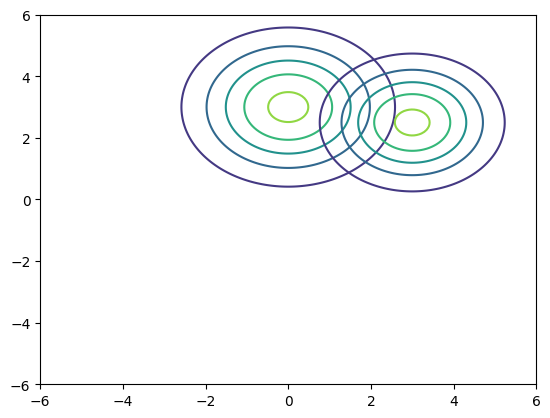

In [ ]:
nx, ny = 200, 200
m1 = np.array([0,3])
C1 = np.array([[2,0], [0,2]], np.float32)
X1, Y1, Z1 = twoDGaussianPlot (nx, ny, m1, C1)

m2 = np.array([3, 2.5])
C2 = np.array([[1.5,0], [0,1.5]], np.float32)
X2, Y2, Z2 = twoDGaussianPlot (nx, ny, m2, C2)


plt.contour(X1, Y1, Z1, 5)
plt.contour(X2, Y2, Z2, 5)

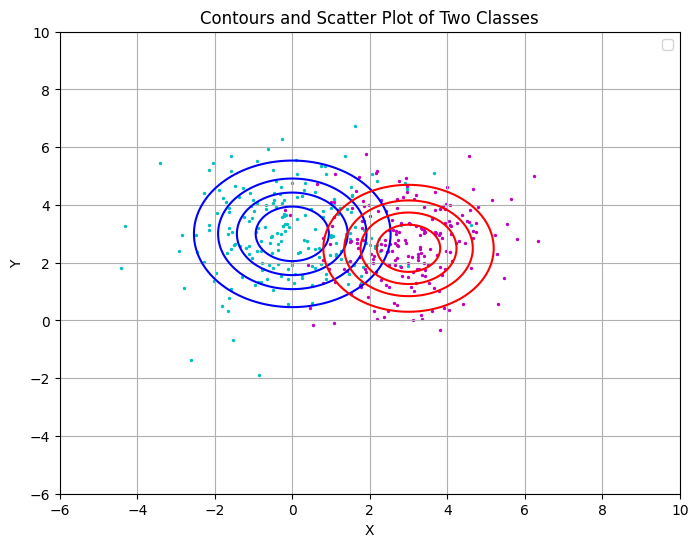

In [ ]:
def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-6, 10, nx)
    y = np.linspace(-6, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            Z[i, j] = gauss2D(xvec, m, C)
    return X, Y, Z

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    d = x - m
    return np.exp(-0.5 * np.dot(d.T, np.dot(Ci, d)))

# Define parameters for contour plots
nx, ny = 200, 200  # Increased number of points for better resolution
m1 = np.array([0, 3])
C1 = np.array([[2, 0], [0, 2]], np.float32)
X1, Y1, Z1 = twoDGaussianPlot(nx, ny, m1, C1)

m2 = np.array([3, 2.5])
C2 = np.array([[1.5, 0], [0, 1.5]], np.float32)
X2, Y2, Z2 = twoDGaussianPlot(nx, ny, m2, C2)

# Define parameters for scatter plot
NumDataPerClass = 200
m1_scatter = np.array([0, 3])
m2_scatter = np.array([3, 2.5])
c1_scatter = np.array([[2, 0], [0, 2]])
c2_scatter = np.array([[1.5, 0], [0, 1.5]])

# Set up the data by generating isotropic Gaussians and rotating them accordingly
A1_scatter = np.linalg.cholesky(c1_scatter)
A2_scatter = np.linalg.cholesky(c2_scatter)

U1_scatter = np.random.randn(NumDataPerClass, 2)
X1_scatter = U1_scatter @ A1_scatter.T + m1_scatter

U2_scatter = np.random.randn(NumDataPerClass, 2)
X2_scatter = U2_scatter @ A2_scatter.T + m2_scatter

plt.figure(figsize=(8, 6))
plt.contour(X1, Y1, Z1, 5, colors='b')  # Contour for class 1
plt.contour(X2, Y2, Z2, 5, colors='r')  # Contour for class 2

# Scatter plot on top of contours
plt.scatter(X1_scatter[:, 0], X1_scatter[:, 1], c="c", s=2)
plt.scatter(X2_scatter[:, 0], X2_scatter[:, 1], c="m", s=2)

# # Scatter plot means
# plt.scatter(m1_scatter[0], m1_scatter[1], color='c', marker='x', label='Class 1 Mean', zorder=5)
# plt.scatter(m2_scatter[0], m2_scatter[1], color='m', marker='x', label='Class 2 Mean', zorder=5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contours and Scatter Plot of Two Classes')
plt.xlim(-6, 10)
plt.ylim(-6, 10)
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Contours on the posterior probability')

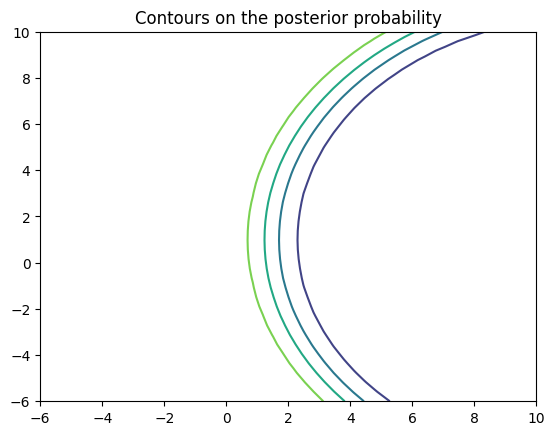

In [ ]:
# Plot contours
#
nx, ny = 50, 40
m1 = np.array([0,3])
m2 = np.array([3,2.5])

C1 = np.array([[2,0], [0,2]], np.float32)
C2 = np.array([[1.5, 0], [0, 1.5]], np.float32)

P1 = 0.5
P2 = 0.5

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 5)
plt.title('Contours on the posterior probability')

In [ ]:
def twoDGaussianPlot (nx, ny, m, C):
  x = np.linspace(-6, 6, nx)
  y = np.linspace(-6, 6, ny)
  X, Y = np.meshgrid(x, y, indexing='ij')
  Z = np.zeros([nx, ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      Z[i,j] = gauss2D(xvec, m, C)
  return X, Y, Z

Part 2

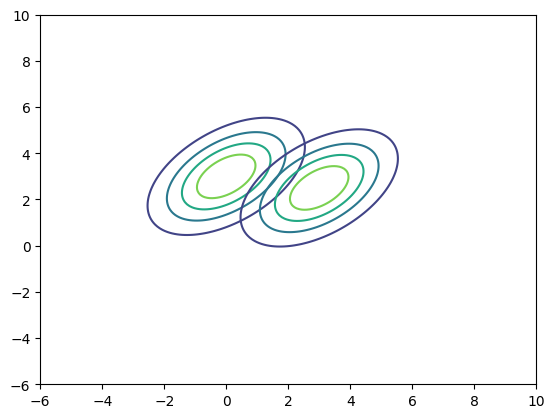

In [ ]:
nx, ny = 200, 200
m1 = np.array([0,3])
C1 = np.array([[2,1], [1,2]], np.float32)
X1, Y1, Z1 = twoDGaussianPlot (nx, ny, m1, C1)

m2 = np.array([3, 2.5])
C2 = np.array([[2, 1], [1, 2]], np.float32)
X2, Y2, Z2 = twoDGaussianPlot (nx, ny, m2, C2)


plt.contour(X1, Y1, Z1, 5)
plt.contour(X2, Y2, Z2, 5)

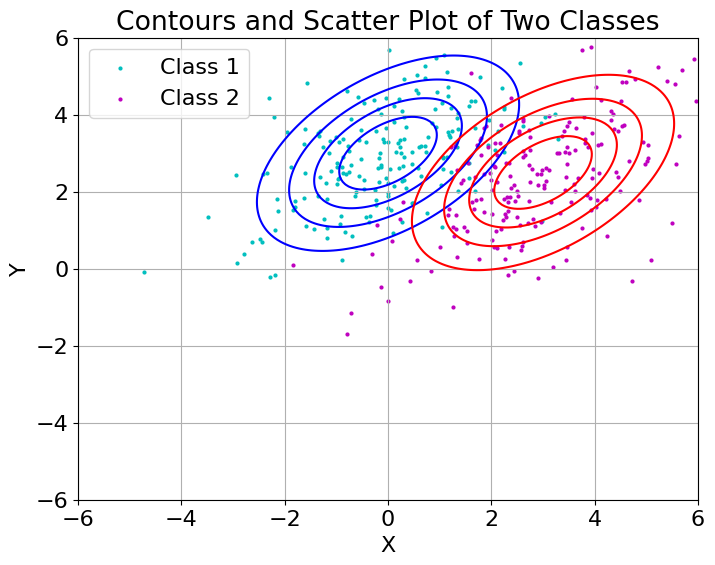

In [ ]:
def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-6, 6, nx)
    y = np.linspace(-6, 6, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            Z[i, j] = gauss2D(xvec, m, C)
    return X, Y, Z

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    d = x - m
    return np.exp(-0.5 * np.dot(d.T, np.dot(Ci, d)))

# Define parameters for contour plots
nx, ny = 200, 200  # Increased number of points for better resolution
m1 = np.array([0, 3])
C1 = np.array([[2, 1], [1, 2]], np.float32)
X1, Y1, Z1 = twoDGaussianPlot(nx, ny, m1, C1)

m2 = np.array([3, 2.5])
C2 = np.array([[2, 1], [1, 2]], np.float32)
X2, Y2, Z2 = twoDGaussianPlot(nx, ny, m2, C2)

# Define parameters for scatter plot
NumDataPerClass = 200
m1_scatter = np.array([0, 3])
m2_scatter = np.array([3, 2.5])
c_scatter = np.array([[2, 1], [1, 2]])

# Set up the data by generating isotropic Gaussians and rotating them accordingly
A_scatter = np.linalg.cholesky(c_scatter)

U1_scatter = np.random.randn(NumDataPerClass, 2)
X1_scatter = U1_scatter @ A_scatter.T + m1_scatter

U2_scatter = np.random.randn(NumDataPerClass, 2)
X2_scatter = U2_scatter @ A_scatter.T + m2_scatter

plt.figure(figsize=(8, 6))
plt.contour(X1, Y1, Z1, 5, colors='b')  # Contour for class 1
plt.contour(X2, Y2, Z2, 5, colors='r')  # Contour for class 2

# Scatter plot on top of contours
plt.scatter(X1_scatter[:, 0], X1_scatter[:, 1], c="c", label='Class 1', s=4)
plt.scatter(X2_scatter[:, 0], X2_scatter[:, 1], c="m", label='Class 2', s=4)

# # Scatter plot means
# plt.scatter(m1_scatter[0], m1_scatter[1], color='c', marker='x', label='Class 1 Mean', zorder=5)
# plt.scatter(m2_scatter[0], m2_scatter[1], color='m', marker='x', label='Class 2 Mean', zorder=5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contours and Scatter Plot of Two Classes')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Compute Fisher Linear Discriminant direction
Ci = np.linalg.inv(2 * C1)
uF = Ci @ (m2 - m1)

print(uF)


[ 1.08333337 -0.66666669]


In [ ]:
uF[1]

-0.6666666865348816

2.3

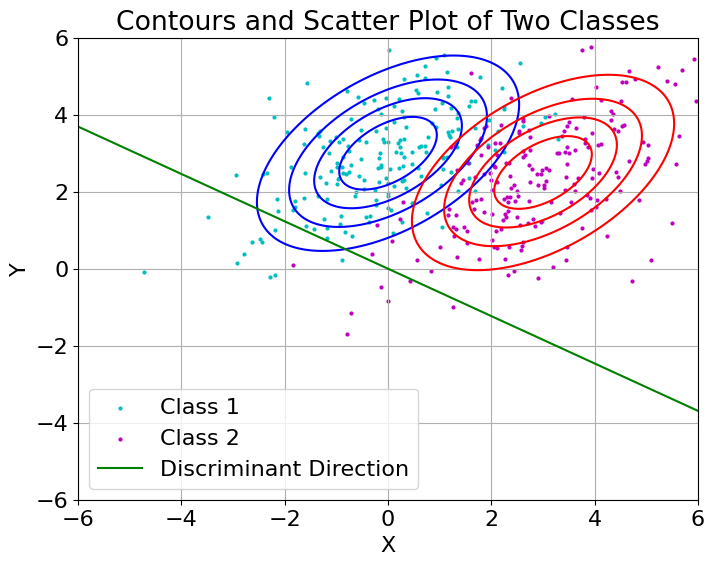

In [ ]:
plt.figure(figsize=(8, 6))
plt.contour(X1, Y1, Z1, 5, colors='b')  # Contour for class 1
plt.contour(X2, Y2, Z2, 5, colors='r')  # Contour for class 2

# Scatter plot on top of contours
plt.scatter(X1_scatter[:, 0], X1_scatter[:, 1], c="c", label='Class 1', s=4)
plt.scatter(X2_scatter[:, 0], X2_scatter[:, 1], c="m", label='Class 2', s=4)

X_line = np.linspace(-6, 6, 100)
projection_line = (uF[1] * X_line) / uF[0]

plt.plot(X_line, projection_line, label='Discriminant Direction', color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contours and Scatter Plot of Two Classes')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.legend()
plt.grid(True)
plt.show()

2.4

In [ ]:
print(X1_scatter.shape)
print(X1_scatter)

2.4

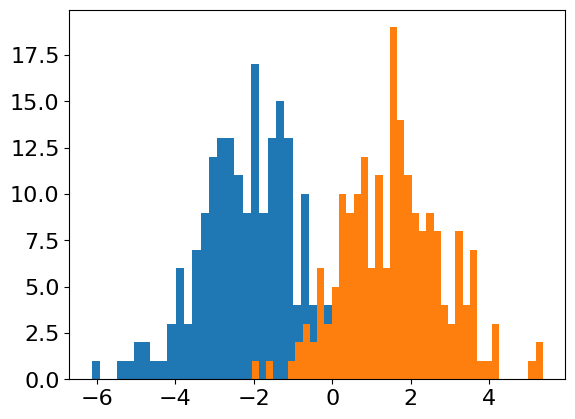

In [ ]:
import matplotlib

# Project each data point onto the projection line
yp1 = np.dot(X1_scatter, uF)
yp2 = np.dot(X2_scatter, uF)

matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')


2.5

-6.123447802774069 5.359526417024372


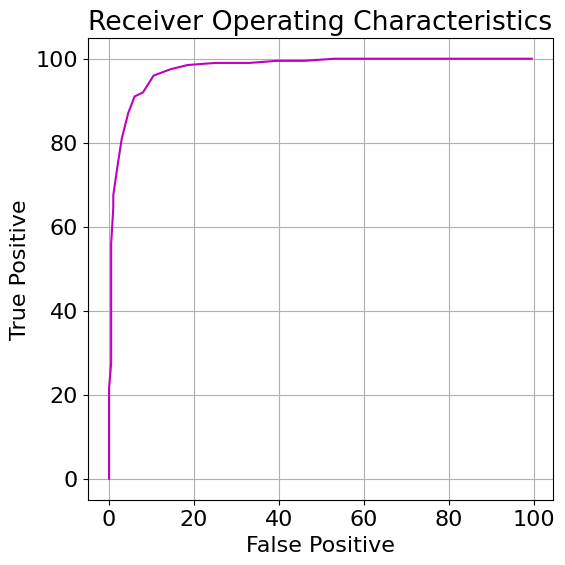

In [ ]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)

# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )

# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
  thresh = thRange[i]
  #print(thresh)
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  ROC[i,:] = [TP, FP]

# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve.png')

2.6

In [ ]:
# prompt: Compute the area under the ROC curve (Hint: try numpy.trapz)

import numpy as np
area = np.trapz(ROC[:,0], ROC[:,1])
print(area)


-9721.625


In [ ]:
# Compute area under the ROC curve
area_under_curve = np.trapz(ROC[:, 0], ROC[:, 1])
print("Area under the ROC curve:", np.abs(area_under_curve))

Area under the ROC curve: 9721.625


2.7

The decision threshold of a Receiver Operating Characteristic (ROC) curve refers to the point at which the classifier's output is compared to a threshold value to make a binary classification decision. The threshold is used to determine the class label for each data point based on the classifier's predicted probability or score.

In a binary classification problem, the classifier assigns a probability or score to each data point, indicating the likelihood of it belonging to the positive class. By adjusting the decision threshold, you can control the trade-off between the classifier's false positive rate (FPR) and true positive rate (TPR).

The ROC curve plots the true positive rate (TPR) on the y-axis against the false positive rate (FPR) on the x-axis, as the decision threshold is varied. Each point on the ROC curve represents a different decision threshold.

The decision threshold determines the point at which the classifier classifies a data point as positive or negative. If the predicted probability or score is above the threshold, the data point is classified as positive; otherwise, it is classified as negative. By adjusting the decision threshold, you can change the classifier's sensitivity to false positives and false negatives, impacting the trade-off between TPR and FPR.

In [ ]:
#For a suitable choice of decision threshold, compute the classification accuracy

# Choose a decision threshold based on the ROC curve
#decision_threshold = 0.5  # Replace with the desired threshold

# Assign a random threshold between pmin and pmax
decision_threshold = np.random.uniform(pmin, pmax)
print("Random Threshold:", decision_threshold)

# Classify data points based on the threshold
classified_data1 = np.where(yp1 > decision_threshold, 1, 0) #If the predicted probability in yp1 is greater than decision_threshold, the corresponding element in classified_data1 will be set to 1. If the decission threshold correctly sort out yp1 it should be less than decission threshold. So all the data points which belong to 1 will be wrong.
classified_data2 = np.where(yp2 > decision_threshold, 1, 0) #If the predicted probability in yp2 is greater than decision_threshold, the corresponding element in classified_data1 will be set to 1. If the decission threshold correctly sort out yp2 it should be greater than decission threshold. So all the data points which belong to 1 will be correct.

# Calculate the number of correctly classified data points for each class
correct_class1 = np.sum(classified_data1 == 0)
correct_class2 = np.sum(classified_data2 == 1)

# Calculate the total number of data points
total_datapoints = len(yp1) + len(yp2)

# Calculate the classification accuracy
accuracy = (correct_class1 + correct_class2) / total_datapoints

print(f"Classification accuracy for threshold {decision_threshold}: {accuracy * 100:.2f}%")


Random Threshold: 1.8440068829134315
Classification accuracy for threshold 1.8440068829134315: 70.50%


2.8

projecting to a random direction

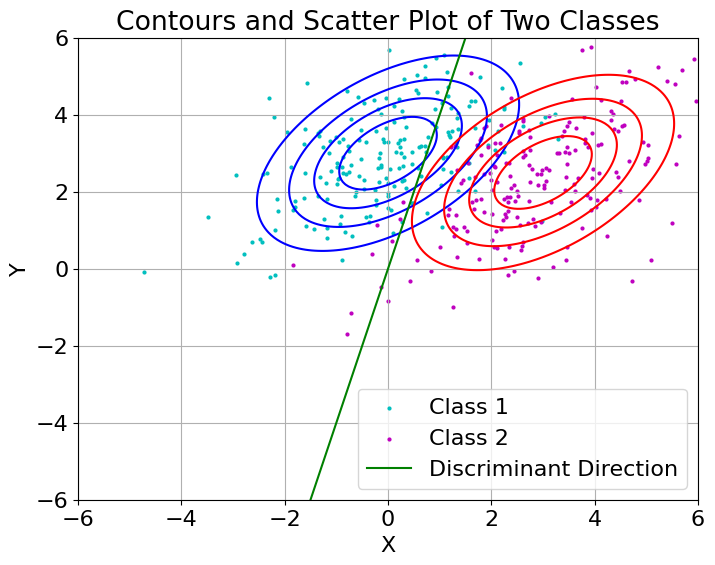

In [ ]:
uF_new = [2, 0.5]

plt.figure(figsize=(8, 6))
plt.contour(X1, Y1, Z1, 5, colors='b')  # Contour for class 1
plt.contour(X2, Y2, Z2, 5, colors='r')  # Contour for class 2

# Scatter plot on top of contours
plt.scatter(X1_scatter[:, 0], X1_scatter[:, 1], c="c", label='Class 1', s=4)
plt.scatter(X2_scatter[:, 0], X2_scatter[:, 1], c="m", label='Class 2', s=4)

X_line = np.linspace(-6, 6, 100)
projection_line = (uF_new[0] * X_line) / uF_new[1]

plt.plot(X_line, projection_line, label='Discriminant Direction', color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contours and Scatter Plot of Two Classes')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.legend()
plt.grid(True)
plt.show()


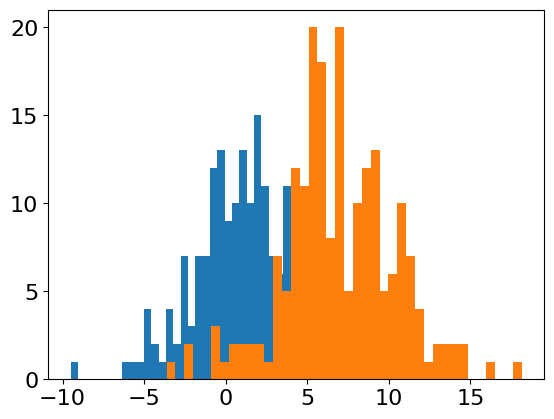

In [ ]:
import matplotlib

# Project each data point onto the projection line
yp1_new = np.dot(X1_scatter, uF_new)
yp2_new = np.dot(X2_scatter, uF_new)

matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1_new, bins=40)
plt.hist(yp2_new, bins=40)
plt.savefig('histogramprojections.png')

-6.123447802774069 5.359526417024372


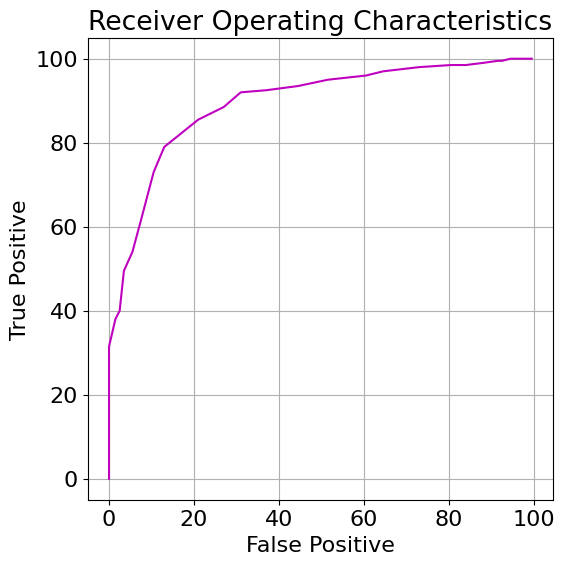

In [ ]:
# Define a range over which to slide a threshold
#
pmin_new = np.min( np.array( (np.min(yp1_new), np.min(yp2_new) )))
pmax_new = np.max( np.array( (np.max(yp1_new), np.max(yp2_new) )))
print(pmin, pmax)

# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin_new, pmax_new, nRocPoints)
ROC_new = np.zeros( (nRocPoints, 2) )

# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
  thresh = thRange[i]
  #print(thresh)
  TP = len(yp2[yp2_new > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1_new > thresh]) * 100 / len(yp1)
  ROC_new[i,:] = [TP, FP]

# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
#ax.plot(ROC[:,1], ROC[:,0], c='g')
ax.plot(ROC_new[:,1], ROC_new[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve.png')

In [ ]:
# prompt: direction connecting the means of the two classes.

# Compute the mean of each class
# m1 = np.mean(X1_scatter, axis=0)
# m2 = np.mean(X2_scatter, axis=0)

# print(m1)

m2 = np.array([3, 0])
m1 = np.array([2.5, 3])

mean_direction_vector = m2 - m1

print(mean_direction_vector)

# # Calculate the direction vector connecting the means
# direction_vector = m2 - m1

# # Normalize the direction vector
# direction_vector = direction_vector / np.linalg.norm(direction_vector)

# # Plot the direction vector
# plt.arrow(m1[0], m1[1], direction_vector[0], direction_vector[1], color='green', width=0.1)

# plt.show()


[ 0.5 -3. ]


0.5
-3.0


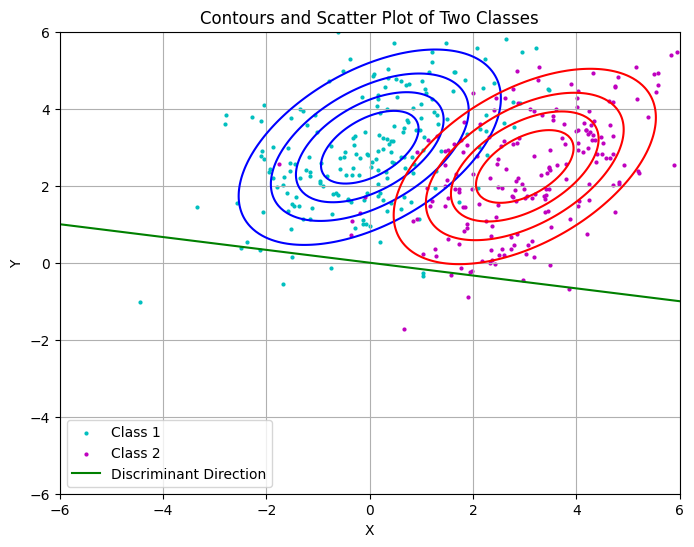

In [ ]:
# uF_new = [2, 0.5]

plt.figure(figsize=(8, 6))
plt.contour(X1, Y1, Z1, 5, colors='b')  # Contour for class 1
plt.contour(X2, Y2, Z2, 5, colors='r')  # Contour for class 2

# Scatter plot on top of contours
plt.scatter(X1_scatter[:, 0], X1_scatter[:, 1], c="c", label='Class 1', s=4)
plt.scatter(X2_scatter[:, 0], X2_scatter[:, 1], c="m", label='Class 2', s=4)

print(mean_direction_vector[0])
print(mean_direction_vector[1])

X_line = np.linspace(-6, 6, 100)
projection_line = (mean_direction_vector[0] * X_line) / mean_direction_vector[1]
# print(projection_line)

plt.plot(X_line, projection_line, label='Discriminant Direction', color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contours and Scatter Plot of Two Classes')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.legend()
plt.grid(True)
plt.show()

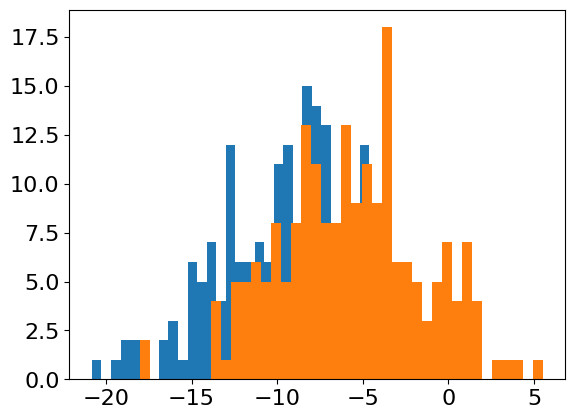

In [ ]:
import matplotlib

# Project each data point onto the projection line
yp1_new_2 = np.dot(X1_scatter, mean_direction_vector)
yp2_new_2 = np.dot(X2_scatter, mean_direction_vector)

matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1_new_2, bins=40)
plt.hist(yp2_new_2, bins=40)
plt.savefig('histogramprojections.png')

-20.826503356423483 5.512410559576172


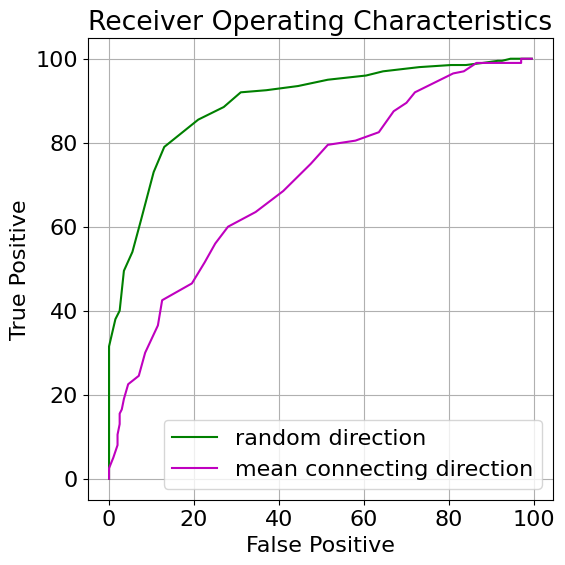

In [ ]:
# Define a range over which to slide a threshold
#
pmin_new_2 = np.min( np.array( (np.min(yp1_new_2), np.min(yp2_new_2) )))
pmax_new_2 = np.max( np.array( (np.max(yp1_new_2), np.max(yp2_new_2) )))
print(pmin_new_2, pmax_new_2)

# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin_new_2, pmax_new_2, nRocPoints)
ROC_new_2 = np.zeros( (nRocPoints, 2) )

# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
  thresh = thRange[i]
  #print(thresh)
  TP = len(yp2[yp2_new_2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1_new_2 > thresh]) * 100 / len(yp1)
  ROC_new_2[i,:] = [TP, FP]

# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC_new[:,1], ROC_new[:,0], c='g', label = 'random direction')
ax.plot(ROC_new_2[:,1], ROC_new_2[:,0], c='m', label = 'mean connecting direction')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.legend()
plt.savefig('rocCurve.png')

In [ ]:
# Compute area under the ROC curve
area_under_curve = np.trapz(ROC_new[:, 0], ROC_new[:, 1])
print("Area under the ROC curve obtained by projecting to a random direction:", np.abs(area_under_curve))

area_under_curve = np.trapz(ROC_new_2[:, 0], ROC_new_2[:, 1])
print("Area under the ROC curve obtained by projecting to the direction connecting means:", np.abs(area_under_curve))

Area under the ROC curve obtained by projecting to a random direction: 8895.625
Area under the ROC curve obtained by projecting to the direction connecting means: 0.0


3 Mahalanobis Distance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

# Function to calculate Euclidean distance
def euclidean_distance(x, mean):
    return np.linalg.norm(x- mean)

# Function to calculate Mahalanobis distance
def mahalanobis_distance(x, mean, cov):
    # diff = x - mean
    # inv_cov = np.linalg.inv(cov)
    return distance.mahalanobis(x, mean, np.linalg.inv(cov))

# Common variables
NumDataPerClass = 200
m1 = np.array([0, 3])  # Corrected from [[0, 3]]
m2 = np.array([3, 2.5])  # Corrected from [[3, 2.5]]
c = np.array([[2, 1], [1, 2]])

A = np.linalg.cholesky(c)

# Generate data points
U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A.T + m2

#concatenate data from two classes into one array
X = np.concatenate((X1, X2), axis=0)

#setting up targets (labels) : set 1 and 2 as labels to indicate 2 classes
labelPos = np.ones(NumDataPerClass) #creates an array filled with ones; size of array = 200
labelNeg = 2 * np.ones(NumDataPerClass) #creates an array filled with 2s
y = np.concatenate((labelPos, labelNeg))
#print(y)
labels = y.tolist()


# Distance-to-Mean Classifier
distances_mean_class1 = [euclidean_distance(point, m1) for point in X]
distances_mean_class2 = [euclidean_distance(point, m2) for point in X]

# print(distances_mean_class1.shape)

distance_to_mean_classifier = []

# Assign labels based on greater distance to mean
for i in range(len(X)):
    label = 2 if distances_mean_class1[i] > distances_mean_class2[i] else 1
    distance_to_mean_classifier.append(label)

#print(distance_to_mean_classifier)



# Accuracy
n_correct = 0

for n in range(len(X)):
    if y[n] == distance_to_mean_classifier[n]:
        n_correct += 1

accuracy = 100 * n_correct / len(X)
print('Accuracy from distance to mean classifier =', accuracy)




# Mahalanobis Distance-to-Mean Classifier
distances_mahalanobis_class1 = [mahalanobis_distance(point, m1, c) for point in X]
distances_mahalanobis_class2 = [mahalanobis_distance(point, m2, c) for point in X]

mahalanobis_distance = []

# Assign labels based on greater distance to mean
for i in range(len(X)):
    label = 2 if distances_mahalanobis_class1[i] > distances_mahalanobis_class2[i] else 1
    mahalanobis_distance.append(label)

#print(mahalanobis_distance)

# Accuracy
n_correct = 0

for n in range(len(X)):
    if y[n] == mahalanobis_distance[n]:
        n_correct += 1

accuracy = 100 * n_correct / len(X)
print('Accuracy from Mahalanobis distance to mean classifier=', accuracy)



Accuracy from distance to mean classifier = 86.25
Accuracy from Mahalanobis distance to mean classifier= 90.75


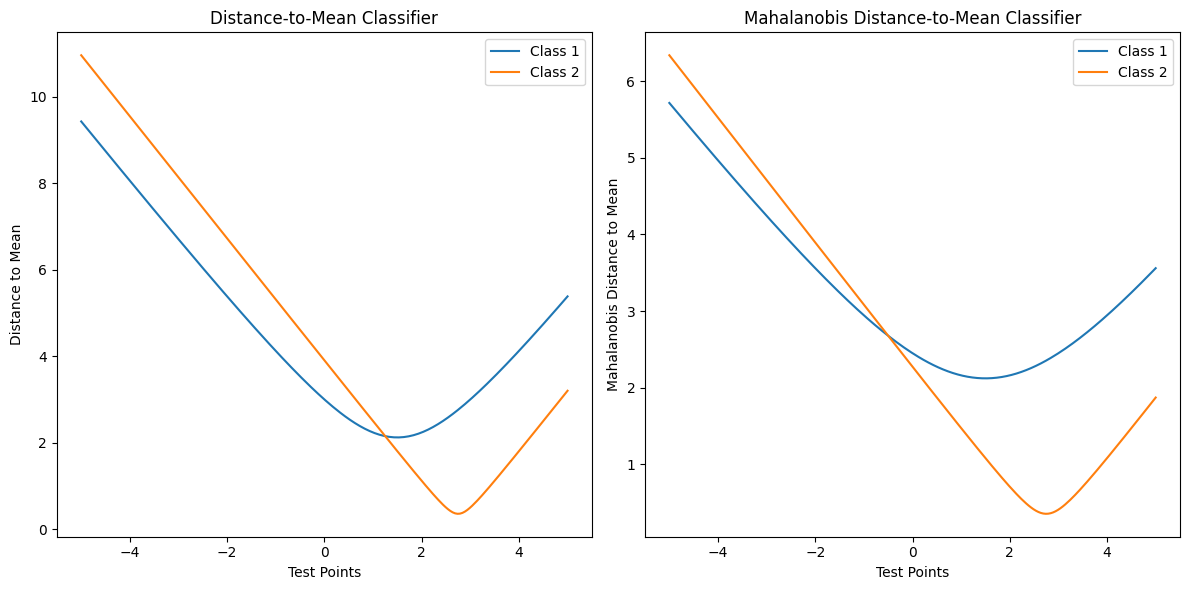

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance
def euclidean_distance(x, mean):
    return np.sqrt(np.sum((x - mean)**2))

# Function to calculate Mahalanobis distance
def mahalanobis_distance(x, mean, cov):
    diff = x - mean
    inv_cov = np.linalg.inv(cov)
    return np.sqrt(np.dot(np.dot(diff.T, inv_cov), diff))

# Common variables
NumDataPerClass = 200
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = C2 = np.array([[2, 1], [1, 2]])
P1 = P2 = 0.5

# Generate data points
X1 = np.random.randn(NumDataPerClass, 2)
Y1 = X1 @ np.linalg.cholesky(C1) + m1
X2 = np.random.randn(NumDataPerClass, 2)
Y2 = X2 @ np.linalg.cholesky(C2) + m2

# Test points
test_points = np.linspace(-5, 5, 200)

# Distance-to-Mean Classifier
distances_mean_class1 = [euclidean_distance(point, m1) for point in test_points]
distances_mean_class2 = [euclidean_distance(point, m2) for point in test_points]

# Mahalanobis Distance-to-Mean Classifier
distances_mahalanobis_class1 = [mahalanobis_distance(point, m1, C1) for point in test_points]
distances_mahalanobis_class2 = [mahalanobis_distance(point, m2, C2) for point in test_points]

# Plotting
plt.figure(figsize=(12, 6))

# Distance-to-Mean Classifier Plot
plt.subplot(1, 2, 1)
plt.plot(test_points, distances_mean_class1, label='Class 1')
plt.plot(test_points, distances_mean_class2, label='Class 2')
plt.xlabel('Test Points')
plt.ylabel('Distance to Mean')
plt.title('Distance-to-Mean Classifier')
plt.legend()

# Mahalanobis Distance-to-Mean Classifier Plot
plt.subplot(1, 2, 2)
plt.plot(test_points, distances_mahalanobis_class1, label='Class 1')
plt.plot(test_points, distances_mahalanobis_class2, label='Class 2')
plt.xlabel('Test Points')
plt.ylabel('Mahalanobis Distance to Mean')
plt.title('Mahalanobis Distance-to-Mean Classifier')
plt.legend()

plt.tight_layout()
plt.show()
